<a href="https://www.kaggle.com/banerjeesoumya15/geeksforgeeks?scriptVersionId=88786466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geeksforgeeks-articles/articles.csv


In [2]:
# import packages
from matplotlib import pyplot as plt
import seaborn as sns

## Dataset Inspection

In [3]:
df = pd.read_csv("/kaggle/input/geeksforgeeks-articles/articles.csv")
df.head()

,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy


### Shape

In [4]:
df.shape

(34574, 5)

The dataset has 34574 rows and 5 columns.

### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34574 entries, 0 to 34573
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         34574 non-null  object
 1   author_id     34555 non-null  object
 2   last_updated  34556 non-null  object
 3   link          34574 non-null  object
 4   category      34574 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


### Columns

In [6]:
for col in df.columns:
    print(col)

title
author_id
last_updated
link
category


### Missing values

In [7]:
df.isna().sum()

title            0
author_id       19
last_updated    18
link             0
category         0
dtype: int64

19 an 18 missing values in `author_id` and `last_updated` columns respectively.

In [8]:
# missing values inspection
df[df['author_id'].isnull() | df['last_updated'].isnull()]

,title,author_id,last_updated,link,category
2353,How to put an input element on the same line a...,mansiagrawal2103,NaN,https://www.geeksforgeeks.org/how-to-put-an-in...,easy
8234,Puzzles,NaN,"23 Jul, 2018",https://www.geeksforgeeks.org/puzzles/,easy
9656,Majority Element,NaN,NaN,https://www.geeksforgeeks.org/majority-element/,easy
9657,"Given an array A[] and a number x, check for p...",NaN,NaN,https://www.geeksforgeeks.org/given-an-array-a...,easy
9658,"Output of the program | Dereference, Reference...",NaN,NaN,https://www.geeksforgeeks.org/dereference-refe...,easy
9659,A Program to check if strings are rotations of...,NaN,NaN,https://www.geeksforgeeks.org/a-program-to-che...,easy
9660,A Program to check if strings are rotations of...,NaN,NaN,https://www.geeksforgeeks.org/a-program-to-che...,easy
9661,Given only a pointer/reference to a node to be...,NaN,NaN,https://www.geeksforgeeks.org/given-only-a-poi...,easy
9662,"Write a program to calculate pow(x,n)",NaN,NaN,https://www.geeksforgeeks.org/write-a-c-progra...,easy
10636,How to use handleChange() function in react co...,piyushnagpal80,NaN,https://www.geeksforgeeks.org/how-to-use-handl...,basic


In [9]:
miss_len = len(df[df['author_id'].isnull() | df['last_updated'].isnull()])
miss_len

23

In [10]:
# proportion of rows
miss_len / len(df)

0.0006652397755538844

Since proportion is 0.06%, very less, we can delete these rows

In [11]:
df.dropna(inplace=True)
print(len(df[df['author_id'].isnull() | df['last_updated'].isnull()]))

0


## Cleaning the data

### Last updated date

In [12]:
# following values are not date format
no_date = []
for val in df['last_updated'].unique():
    if "," not in val:
        no_date.append(val)
no_date

['Medium', 'Easy', 'Basic', 'Hard']

In [13]:
df = df[~df['last_updated'].isin(no_date)]
df.shape

(34455, 5)

In [14]:
df['dt_last_updated'] = pd.to_datetime(df['last_updated'], format='%d %b, %Y', infer_datetime_format=False)
df.head()

,title,author_id,last_updated,link,category,dt_last_updated
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,2022-02-21
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,2022-02-20
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,2022-02-17
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,2022-02-17
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,2022-02-21


## Feature Engineering

### last_updated

In [15]:
# create month, day of week, week number

month_name = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}

df['month'] = df['dt_last_updated'].dt.month.map(month_name)

In [16]:
df.head()

,title,author_id,last_updated,link,category,dt_last_updated,month
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,2022-02-21,February
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,2022-02-20,February
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,2022-02-17,February
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,2022-02-17,February
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,2022-02-21,February


In [17]:
df['day_name'] = df['dt_last_updated'].dt.day_name()
df.head()

,title,author_id,last_updated,link,category,dt_last_updated,month,day_name
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,2022-02-21,February,Monday
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,2022-02-20,February,Sunday
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,2022-02-17,February,Thursday
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,2022-02-17,February,Thursday
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,2022-02-21,February,Monday


In [18]:
df['week'] = df['dt_last_updated'].dt.isocalendar().week
df.head()

,title,author_id,last_updated,link,category,dt_last_updated,month,day_name,week
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,2022-02-21,February,Monday,8
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,2022-02-20,February,Sunday,7
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,2022-02-17,February,Thursday,7
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,2022-02-17,February,Thursday,7
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,2022-02-21,February,Monday,8


In [19]:
df['year'] = df['dt_last_updated'].dt.year
df.head()

,title,author_id,last_updated,link,category,dt_last_updated,month,day_name,week,year
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,2022-02-21,February,Monday,8,2022
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,2022-02-20,February,Sunday,7,2022
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,2022-02-17,February,Thursday,7,2022
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,2022-02-17,February,Thursday,7,2022
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,2022-02-21,February,Monday,8,2022


### title

In [20]:
# title
# length of title

df['length_title'] = df['title'].str.len()
df.head()

,title,author_id,last_updated,link,category,dt_last_updated,month,day_name,week,year,length_title
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,2022-02-21,February,Monday,8,2022,38
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,2022-02-20,February,Sunday,7,2022,28
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,2022-02-17,February,Thursday,7,2022,44
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,2022-02-17,February,Thursday,7,2022,25
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,2022-02-21,February,Monday,8,2022,16


In [21]:
# count no. of words in title

df['count_words_title'] = df['title'].str.split().apply(len)
df.head()

,title,author_id,last_updated,link,category,dt_last_updated,month,day_name,week,year,length_title,count_words_title
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,2022-02-21,February,Monday,8,2022,38,7
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,2022-02-20,February,Sunday,7,2022,28,4
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,2022-02-17,February,Thursday,7,2022,44,9
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,2022-02-17,February,Thursday,7,2022,25,4
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,2022-02-21,February,Monday,8,2022,16,3


## Analysis

In [22]:
def count_plot(col, size=(15,8), df=df):

    print(df[col].value_counts())
    
    plt.figure(figsize=size)
    sns.set(style="darkgrid")
    sns.countplot(x=col, data=df)
    plt.title(f"Count plot of {col}")
    plt.show()

### category

medium    10409
easy       9602
basic      8127
hard       4223
expert     2094
Name: category, dtype: int64


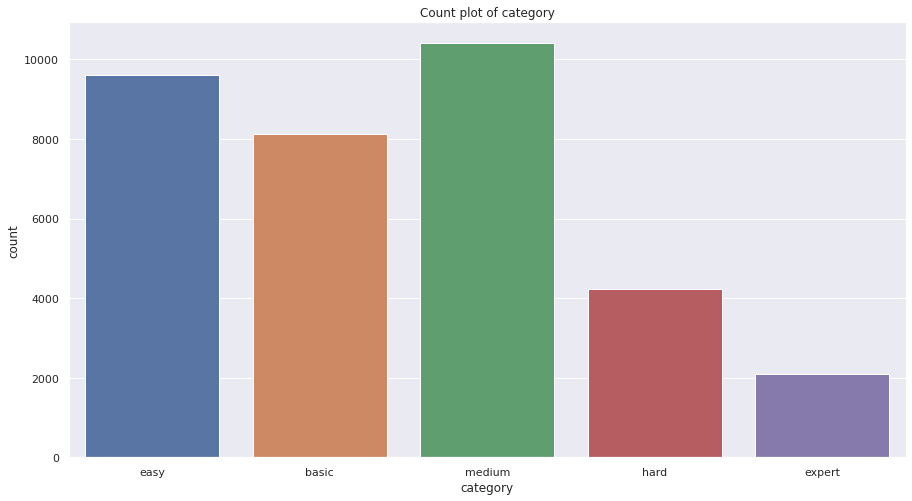

In [23]:
count_plot('category')

### month

June         4060
May          3331
January      3206
August       3192
November     2932
September    2918
July         2823
October      2775
February     2716
December     2674
April        2318
March        1510
Name: month, dtype: int64


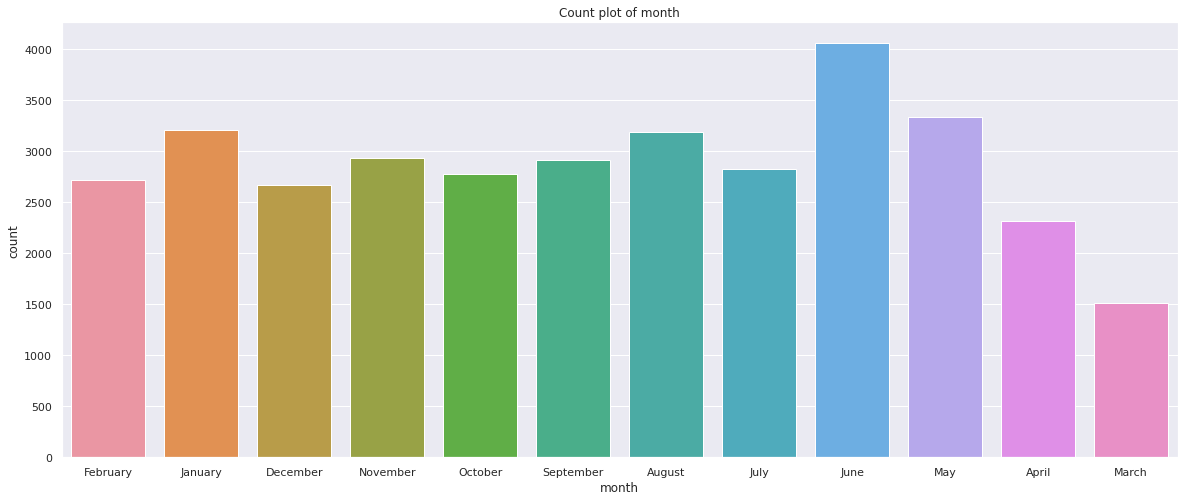

In [24]:
count_plot('month', (20,8))

### day_name

Monday       7314
Wednesday    6413
Tuesday      6358
Thursday     5980
Friday       5602
Sunday       1628
Saturday     1160
Name: day_name, dtype: int64


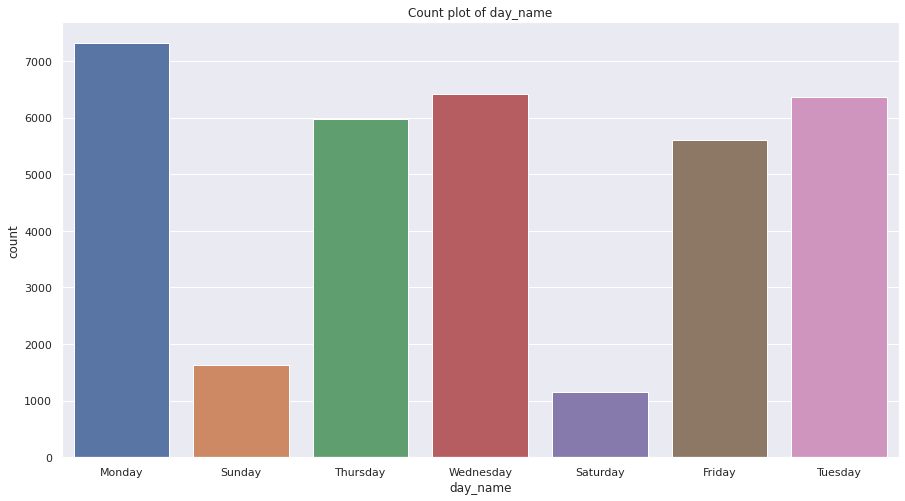

In [25]:
count_plot('day_name')

### week

26    1950
21     916
3      903
47     897
7      831
35     827
2      803
40     788
22     777
4      770
6      770
17     752
31     750
48     741
19     736
20     727
27     721
36     720
50     697
42     680
34     678
32     670
37     669
25     666
33     665
18     664
38     646
49     643
43     638
5      628
39     620
23     617
28     612
30     608
24     602
8      590
45     581
29     576
44     553
46     543
51     522
1      510
16     510
41     493
14     483
52     419
12     416
15     411
13     395
9      304
11     282
10     264
53     221
Name: week, dtype: Int64


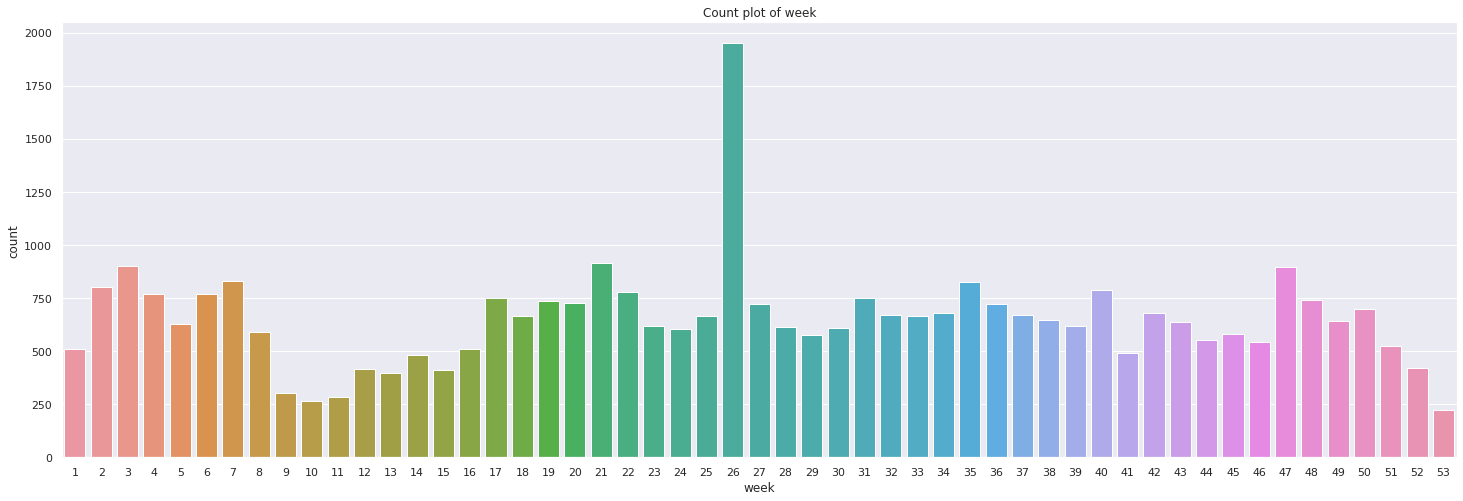

In [26]:
count_plot('week', (25,8))

### year

2021    18613
2020     4625
2019     3985
2022     3187
2018     2522
2017     1021
2016      200
2015      172
2013       70
2014       53
2012        5
2010        1
2011        1
Name: year, dtype: int64


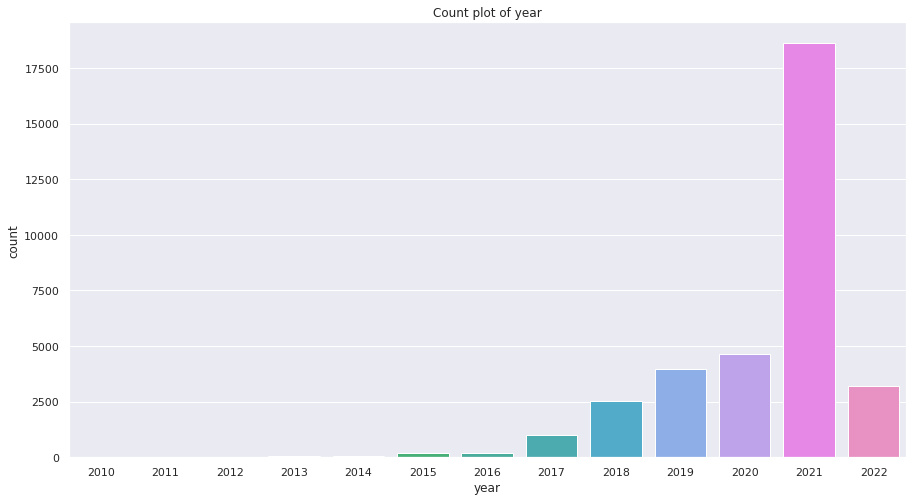

In [27]:
count_plot('year')

### author_id

In [28]:
df['author_id'].value_counts()

GeeksforGeeks        11932
ManasChhabra2          317
Striver                261
manjeet_04             246
Chinmoy Lenka          191
                     ...  
KritikaSharma21          1
RatulSarkar1             1
shivamyadav17            1
ksinghshubh              1
sandeep tadepalli        1
Name: author_id, Length: 5583, dtype: int64

In [29]:
auth_count = df['author_id'].value_counts()[1:21]
auth_count

ManasChhabra2          317
Striver                261
manjeet_04             246
Chinmoy Lenka          191
pawan_asipu            155
sarthak_ishu11         151
anuupadhyay            146
Shubrodeep Banerjee    143
ankita_saini           125
MKS075                 121
Code_r                 120
pp_pankaj              114
harkiran78             114
RishabhPrabhu          110
Sahil_Bansall          101
Sanjit_Prasad           98
spp____                 95
anuj0503                93
Shivam.Pradhan          93
andrew1234              91
Name: author_id, dtype: int64

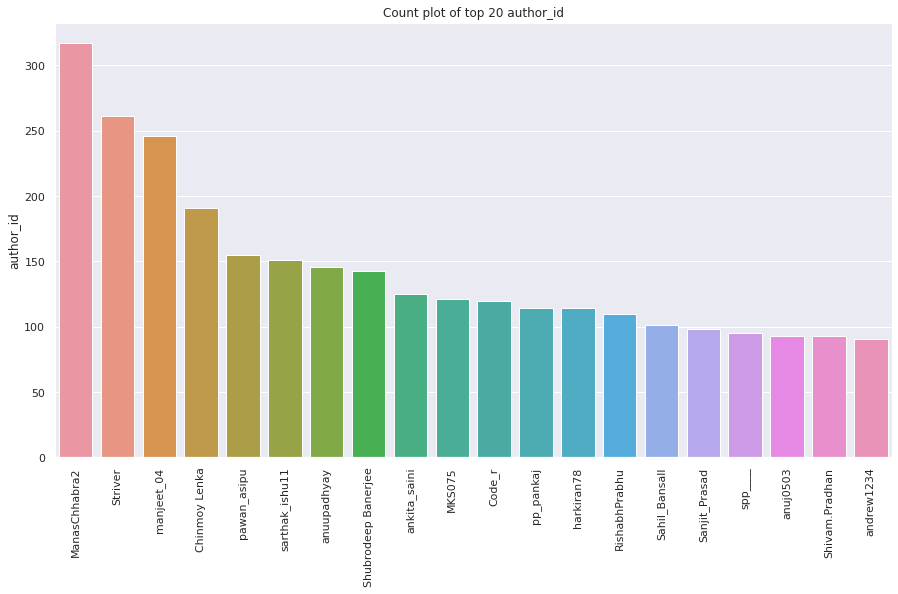

In [30]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x = auth_count.index, y = auth_count)
#sns.countplot(x='author_id', data=df)
plt.title("Count plot of top 20 author_id")
plt.xticks(rotation=90)
plt.show()

### count_words_title

6    4482
Name: count_words_title, dtype: int64


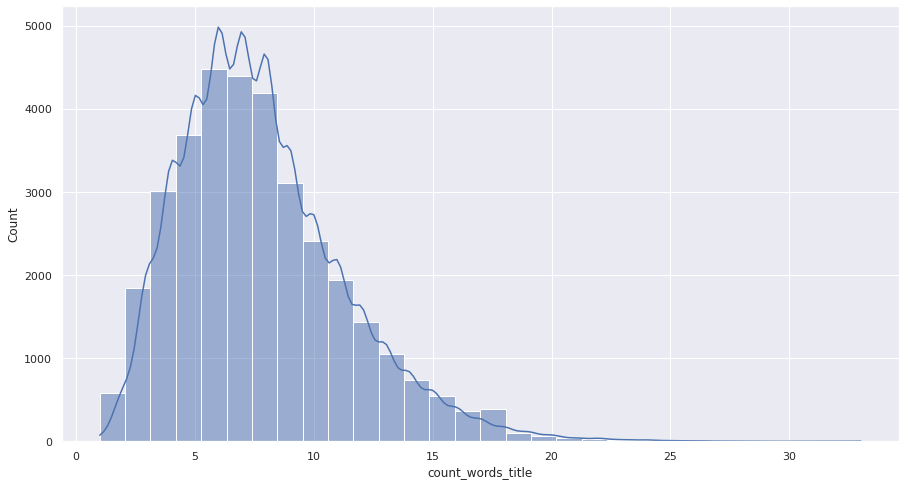

In [31]:
print(df['count_words_title'].value_counts().head(1))

plt.figure(figsize=(15,8))
sns.histplot(data=df, x='count_words_title', bins=30, kde=True)
plt.show()

### length_title

33    1221
Name: length_title, dtype: int64


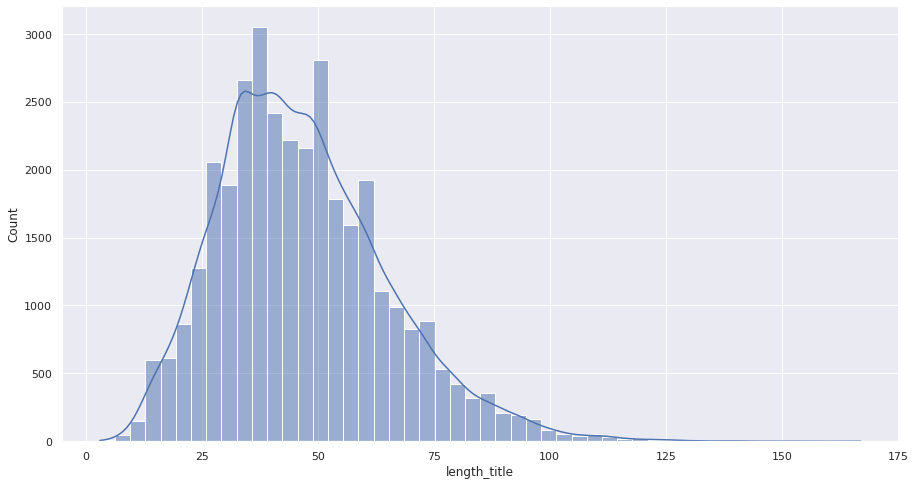

In [32]:
print(df['length_title'].value_counts().head(1))

plt.figure(figsize=(15,8))
sns.histplot(data=df, x='length_title', bins=50, kde=True)
plt.show()

## Word cloud

### title

In [33]:
from wordcloud import WordCloud, STOPWORDS

In [34]:
words = ''
stopwords = set(STOPWORDS)

for val in df.title.str.lower():
    words += val + " "

print(len(words))

1648823


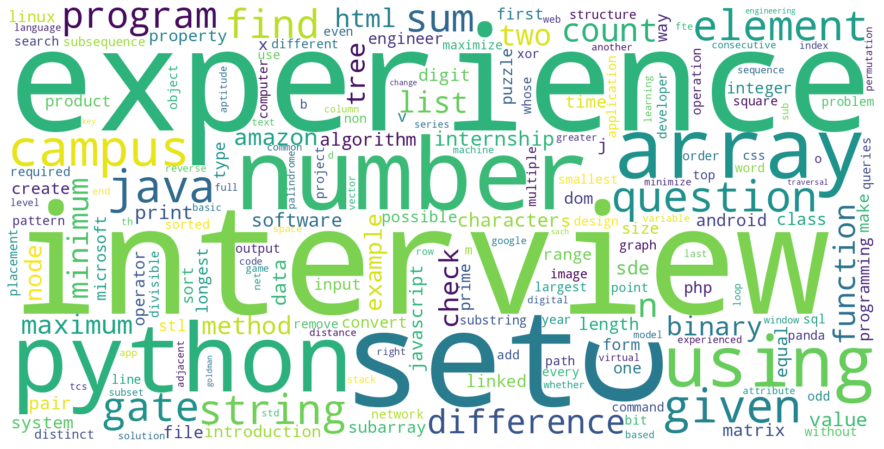

In [35]:
cloud = WordCloud(collocations = False, width = 1600, height = 800,
                  background_color='white',
                stopwords = stopwords).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (30, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()